## Observations and Insights

1. 

## Dependencies and starter code

In [11]:
# Import dependencies:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Import study data files:
mouse_metadata = "Data/Mouse_metadata.csv"
study_results = "Data/Study_results.csv"

# Read the mouse data and the study results:
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset:
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID" )
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_drug_regimen = combined_df.groupby(["Drug Regimen"])

tumor_volume_mean = grouped_drug_regimen.mean()["Tumor Volume (mm3)"]
tumor_volume_median = grouped_drug_regimen.median()["Tumor Volume (mm3)"]
tumor_volume_var = grouped_drug_regimen.var()["Tumor Volume (mm3)"]
tumor_volume_stdev = grouped_drug_regimen.std()["Tumor Volume (mm3)"]
tumor_volume_sem = grouped_drug_regimen.sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
    "Mean": tumor_volume_mean,
    "Median": tumor_volume_median,
    "Variance": tumor_volume_var,
    "Standard Deviation": tumor_volume_stdev,
    "SEM": tumor_volume_sem,
})

# Apply formatting to summary dataframe:

summary_df["Mean"] = summary_df["Mean"].map("{:,.2f}".format)
summary_df["Median"] = summary_df["Median"].map("{:,.2f}".format)
summary_df["Variance"] = summary_df["Variance"].map("{:,.2f}".format)
summary_df["Standard Deviation"] = summary_df["Standard Deviation"].map("{:,.2f}".format)
summary_df["SEM"] = summary_df["SEM"].map("{:,.2f}".format)

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

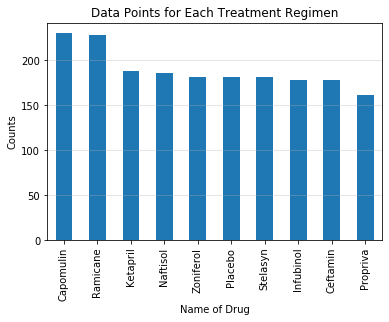

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas:

drug_count = combined_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar")

plt.title("Data Points for Each Treatment Regimen")
plt.xlabel("Name of Drug")
plt.ylabel("Counts")
plt.grid(axis="y", alpha=0.4)
plt.show()

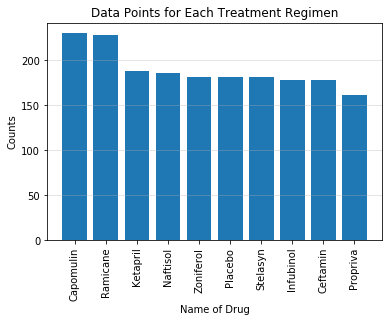

In [38]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot:

plt.bar(drug_count.index.values, drug_count.values)

plt.xticks(rotation=90)
plt.title("Data Points for Each Treatment Regimen")
plt.xlabel("Name of Drug")
plt.ylabel("Counts")
plt.grid(axis="y", alpha=0.4)
plt.show()

## Pie plots

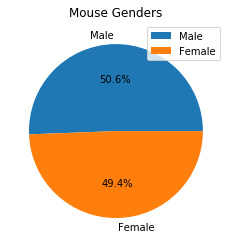

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas:

mice_gender = combined_df["Sex"].value_counts()
mice_gender.plot(kind="pie", autopct="%1.1f%%")

plt.title("Mouse Genders")
plt.ylabel("")
plt.legend(loc="upper right")
plt.show()

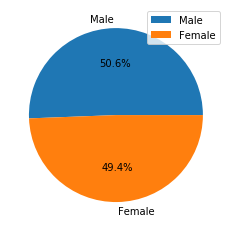

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot:

plt.pie(mice_gender.values, autopct="%1.1f%%", labels=mice_gender.index.values)
plt.legend(loc="upper right")
plt.show()

## Quartiles, outliers and boxplots

In [17]:
# Group the data by mouse ID:

mouse_ID_grouped = combined_df.groupby(["Mouse ID"]).max()
mouse_ID_grouped = mouse_ID_grouped.reset_index()
mouse_ID_grouped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Merge mouse_ID_grouped dataframe with combined_df:

mouse_merged_df = mouse_ID_grouped[["Mouse ID", "Timepoint"]].merge(combined_df, on=["Mouse ID", "Timepoint"], how="left")
mouse_merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 

capomulin_df = mouse_merged_df.loc[mouse_merged_df["Drug Regimen"]=="Capomulin"]
capomulin = capomulin_df["Tumor Volume (mm3)"]

ramicane_df = mouse_merged_df.loc[mouse_merged_df["Drug Regimen"]=="Ramicane"]
ramicane = ramicane_df["Tumor Volume (mm3)"]

infubinol_df = mouse_merged_df.loc[mouse_merged_df["Drug Regimen"]=="Infubinol"]
infubinol = infubinol_df["Tumor Volume (mm3)"]

ceftamin_df = mouse_merged_df.loc[mouse_merged_df["Drug Regimen"]=="Ceftamin"]
ceftamin = ceftamin_df["Tumor Volume (mm3)"]

In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers: 

# Capomulin:

cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr), 2)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr), 2)

print("Capomulin:")
print(f"Values below {cap_lower_bound} and above {cap_upper_bound} could be outliers.")

# Ramicane:

ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = round(ram_lowerq - (1.5*ram_iqr), 2)
ram_upper_bound = round(ram_upperq + (1.5*ram_iqr), 2)

print("Ramicane:")
print(f"Values below {ram_lower_bound} and above {ram_upper_bound} could be outliers.")

# Infubinol:

inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = round(inf_lowerq - (1.5*inf_iqr), 2)
inf_upper_bound = round(inf_upperq + (1.5*inf_iqr), 2)

print("Infubinol:")
print(f"Values below {inf_lower_bound} and above {inf_upper_bound} could be outliers.")

# Ceftamin:

cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lower_bound = round(cef_lowerq - (1.5*cef_iqr), 2)
cef_upper_bound = round(cef_upperq + (1.5*cef_iqr), 2)

print("Ceftamin:")
print(f"Values below {cef_lower_bound} and above {cef_upper_bound} could be outliers.")

Capomulin:
Values below 20.7 and above 51.83 could be outliers.
Ramicane:
Values below 17.91 and above 54.31 could be outliers.
Infubinol:
Values below 36.83 and above 82.74 could be outliers.
Ceftamin:
Values below 25.36 and above 87.67 could be outliers.


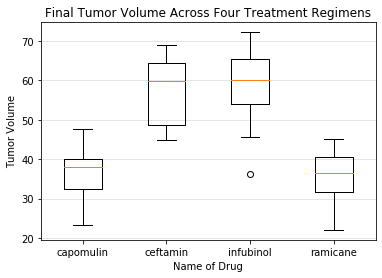

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest:

plt.boxplot([capomulin, ceftamin, infubinol, ramicane], labels=["capomulin", "ceftamin", "infubinol", "ramicane"])

plt.title("Final Tumor Volume Across Four Treatment Regimens")
plt.xlabel("Name of Drug")
plt.ylabel("Tumor Volume")
plt.grid(axis="y", alpha=0.4)
plt.show()

## Line and scatter plots

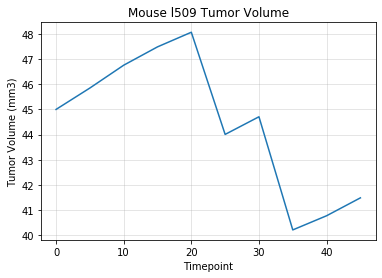

In [41]:
# Generate a line plot of time point versus tumor volume for mouse l509 treated with Capomulin:

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_mousel509 = capomulin_df.loc[combined_df["Mouse ID"] == "l509"]
timepoint_mousel509 = capomulin_mousel509["Timepoint"]
tumor_volume_mousel509 = capomulin_mousel509["Tumor Volume (mm3)"]

capomulin_mousel509_graph = plt.plot(timepoint_mousel509, tumor_volume_mousel509)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse l509 Tumor Volume")
plt.grid(alpha=0.4)
plt.show()

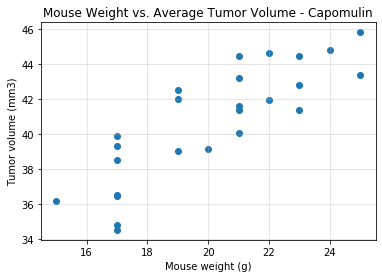

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_ID_grouped = capomulin_df.groupby(["Mouse ID"]).mean()

mouse_weight = mouse_ID_grouped["Weight (g)"]
tumor_volume = mouse_ID_grouped["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, tumor_volume)

plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume - Capomulin")
plt.grid(alpha=0.4)
plt.show()

The correlation coefficient between mouse weight and average tumor volume is 0.84.


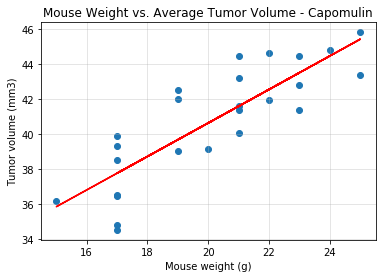

In [43]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(mouse_weight, tumor_volume)[0], 2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regress_values, "r-")

plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume - Capomulin")
plt.grid(alpha=0.4)
plt.show()